# Full Text of a Collection

Next we can look at getting the entire full text of a collection, some of our collections are very large and are slow to do analysis on so with this tool I suggest you use one of our smaller full text collections like:
 - darwin
 - florence
 - vma

## Getting the items

In [ ]:
import json, requests, math, re, string, nltk

nltk.download("punkt") # Word tokenizer
nltk.download("stopwords") # Stop words
from nltk import word_tokenize

### Choose a collection and get its item count

In [2]:
# Collection to get data from
collection = 'darwin'

# Query the API for the collection information
collectionUrl = 'https://oc-index.library.ubc.ca/collections/'+collection
apiResponse = requests.get(collectionUrl).json()

# Get count of items in collection
itemCount = apiResponse['data']['items']

# Get collection name
collectionTitle = apiResponse['data']['title']
'Collection: "' + collectionTitle + '" has ' + str(itemCount) + ' items'

'Collection: "Charles Darwin Letters" has 52 items'

### Loop through collection item list to get item ids

In [3]:
perPage = 25
offset = 0
pages = math.ceil(itemCount / 25)

# Loop through collection item pages to get all items
itemIds = []
for x in range(0, pages):
    collectionItemsUrl = 'https://oc-index.library.ubc.ca/collections/'+collection+'/items?limit='+str(perPage)+'&offset='+str(offset)
    offset += 25 
    # Get list of 25 items
    apiResponse = requests.get(collectionItemsUrl).json()
    collectionItems = apiResponse['data']
    # Add each item id to the itemIds list
    for collectionItem in collectionItems:
        itemIds.append(collectionItem['_id'])
print(itemIds)

['1.0000079', '1.0000080', '1.0000084', '1.0000088', '1.0000093', '1.0000097', '1.0000103', '1.0000130', '1.0000134', '1.0000138', '1.0000143', '1.0000147', '1.0000152', '1.0000083', '1.0000087', '1.0000092', '1.0000096', '1.0000102', '1.0000133', '1.0000137', '1.0000142', '1.0000146', '1.0000151', '1.0000082', '1.0000086', '1.0000091', '1.0000095', '1.0000099', '1.0000101', '1.0000132', '1.0000136', '1.0000141', '1.0000145', '1.0000149', '1.0000150', '1.0000154', '1.0000200', '1.0000081', '1.0000085', '1.0000089', '1.0000090', '1.0000094', '1.0000098', '1.0000100', '1.0000104', '1.0000131', '1.0000135', '1.0000139', '1.0000140', '1.0000144', '1.0000148', '1.0000153']


### Loop through item ids and get the item data

In [4]:
items = []
fullTexts = []
for itemId in itemIds : 
    itemUrl = 'https://oc-index.library.ubc.ca/collections/'+collection+'/items/'+itemId
    apiResponse = requests.get(itemUrl).json()
    item = apiResponse['data']
    items.append(item)
    if 'FullText' in item:
        fullText = item['FullText'][0]['value']
        # Lower case full text
        cleanFullText = fullText.lower()
        # Remove everything but words
        pattern = re.compile('[\W_]+')
        cleanFullText = pattern.sub(' ', cleanFullText)
        # Add to the full texts list
        fullTexts.append(cleanFullText)
    else:
        fullTexts.append('')
'Done'

'Done'

### Character Count

In [5]:
characterLength = 0
for fullText in fullTexts:
    characterLength += len(fullText)
characterLength

58945

### Token count

In [6]:
tokens = []
for fullText in fullTexts:
    tokens += word_tokenize(fullText)
len(tokens)

11156

### Unique token count

In [7]:
len(set(tokens))

2182

### Average number of times a token is used

In [8]:
len(tokens)/len(set(tokens))

5.112740604949588

### Search hit count

In [9]:
search = "will"

In [10]:
text = nltk.Text(tokens)
text.count(search)

80

### Percentage of full text that the search takes up

In [11]:
100.0*fullText.count(search)/len(fullText) 

0.06978367062107467

### Concordance search on the full text

In [12]:
text.concordance(search)

Displaying 25 of 80 matches:
if i can get propionic butyric acids will it be troublesome to ascertain wheth
 ascertain whether these with pepsin will digest albumen meat oct 18th c darwi
s the influence of certain fluids it will be well to explain how the enclosed 
es so as to catch your attention you will confer a great kindness on me if you
confer a great kindness on me if you will advise me ever so briefly or make an
o briefly or make any suggestions it will perhaps save you a little trouble to
hing of the kind or something better will be done i feel very anxious on the s
ward to the next number in which you will give your discovery which the more i
 now come home knows fibro cartilage will get me some from a joint or from the
ugh way for pepsine in the autumn he will discover what acid the digestive jui
o hear the result i hope this letter will not have wearied you believe me your
ear from paget have again seen you i will if you will allow me call tomorrow m
et have again seen you 

### Words used similarly to search

In [13]:
text.similar(search)

would can must wd shd is do has should not again shall quite could
were might have may all to


### Longest words in full text

In [14]:
v = set(text)
long_words = [word for word in v if len(word) > 15]
sorted(long_words)

['afterconversation',
 'dissolvedecalcified',
 'sufficientlystruck',
 'youmisunderstood']

### Collocations

In [15]:
text.collocations()

beckenham kent; queen anne; fibrous basis; fibro cartilage; anne
street; fatty acids; gastric juice; railway station; station
orpington; old friend; charles darwin; son frank; sandown isle;
sincerely charles; brit assoc; digestive fluid; broadlands sandown;
kent railway; heat rigor; much obliged


### Lexical dispersion of search

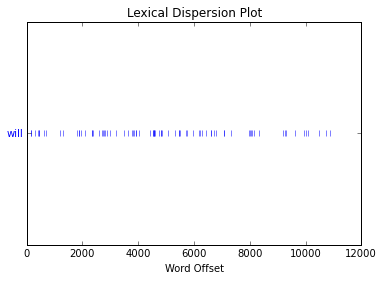

In [16]:
import numpy
# allow visuals to show up in this interface-
% matplotlib inline 
text.dispersion_plot([search])

### Frequency Distribution of words

In [17]:
from nltk import FreqDist
fdist = FreqDist(text)
fdist.most_common(50)

[('the', 452),
 ('i', 413),
 ('to', 351),
 ('of', 330),
 ('a', 192),
 ('that', 176),
 ('it', 165),
 ('you', 154),
 ('in', 152),
 ('is', 137),
 ('have', 124),
 ('as', 113),
 ('my', 110),
 ('not', 109),
 ('be', 108),
 ('on', 100),
 ('me', 96),
 ('for', 93),
 ('very', 83),
 ('with', 80),
 ('will', 80),
 ('by', 66),
 ('but', 66),
 ('which', 64),
 ('this', 63),
 ('if', 63),
 ('and', 62),
 ('your', 60),
 ('dear', 59),
 ('or', 55),
 ('he', 53),
 ('at', 53),
 ('darwin', 51),
 ('was', 51),
 ('had', 49),
 ('much', 48),
 ('so', 47),
 ('mr', 46),
 ('yours', 46),
 ('would', 45),
 ('drosera', 44),
 ('sanderson', 44),
 ('think', 42),
 ('has', 42),
 ('are', 40),
 ('dr', 39),
 ('his', 39),
 ('can', 38),
 ('do', 38),
 ('s', 38)]

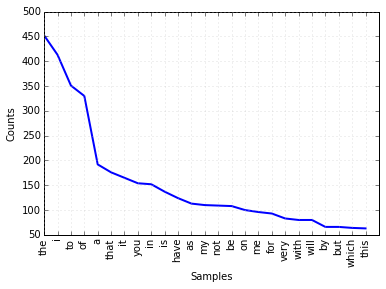

In [18]:
fdist.plot(25)